# Single Layer Perceptron Learning Algorithm From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('IRIS.csv')

The dataset consists of 150 records, each representing a type of IRIS flower. There are three types of IRIS flowers, with 50 records for each type. Each record is described by four features. For our analysis, we will simplify the problem to be linearly separable by using only two out of the three flower types and two out of the four features.

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# remove one class of flowers and leave only two
df = df[~(df['species'] == 'Iris-virginica')]
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [7]:
df.shape

(100, 5)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [9]:
# remove two features and leave only two
df = df.iloc[:, -3:]
df.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [10]:
# add a column of ones for the bias weight, to be used in the model later
df['xb'] = 1

In [11]:
# encode the two classes of IRIS to numerical values; eiher -1 or 1
df['species_enconded'] = df['species'].map({'Iris-setosa': -1, 'Iris-versicolor':1})
df.head()

,petal_length,petal_width,species,xb,species_enconded
0,1.4,0.2,Iris-setosa,1,-1
1,1.4,0.2,Iris-setosa,1,-1
2,1.3,0.2,Iris-setosa,1,-1
3,1.5,0.2,Iris-setosa,1,-1
4,1.4,0.2,Iris-setosa,1,-1


Split the data. 60 entries for trainging, 20 for validation and 20 for testing

In [12]:
# get the training set
X = df.sample(60, random_state=1)
X.shape

(60, 5)

In [13]:
# validation and testing sets
val_test = df[~df.isin(X)]
val_test.dropna(inplace=True)
val_test.shape

(40, 5)

In [14]:
# get the validation set
Y_val = val_test.sample(20, random_state=1)
Y_val.shape

(20, 5)

In [15]:
# get the testing set
Y_test = val_test[~val_test.isin(Y_val)]
Y_test.dropna(inplace=True)
Y_test.shape

(20, 5)

In [16]:
# drop the species column of type object
X.drop('species', axis=1, inplace=True)
Y_val.drop('species', axis=1, inplace=True)
Y_test.drop('species', axis=1, inplace=True)
X.head()

,petal_length,petal_width,xb,species_enconded
80,3.8,1.1,1,1
84,4.5,1.5,1,1
33,1.4,0.2,1,-1
81,3.7,1.0,1,1
93,3.3,1.0,1,1


Training the perceptron

In [17]:
from IPython.display import clear_output
import time

In [18]:
# set this variable to False, if you want to disable showing the model learning and fitting
# a classification line
show_learning = True

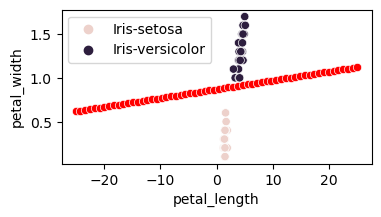

loss at epoch 0: 28
loss at epoch 1: 28
loss at epoch 2: 11
loss at epoch 3: 4
loss at epoch 4: 3
loss at epoch 5: 1
loss at epoch 6: 3
loss at epoch 7: 3
loss at epoch 8: 0


In [19]:
# Initialize weights with random values and reshape to 1x3 matrix
Wi = np.random.rand(3)
Wi = Wi.reshape(1, 3)

# Set learning rate
eta = 0.01

# Initialize loss and epoch
loss = 1
epoch = -1

# Dictionary to store losses for each epoch
losses = {}

# Loop until loss is zero
while loss != 0:
    # Increment epoch and reset loss
    epoch += 1
    loss = 0

    # Loop over all samples in the dataset
    for i in range(len(X)):
        # Get features and target for the current sample
        Xi = X.iloc[i, :-1].to_numpy()
        Xi = Xi.reshape(3, 1)
        Ti = X.iloc[i, -1]

        # Compute output using current weights
        Yi = np.sign(np.dot(Wi, Xi))
        
        # Compute error
        Ei = Ti - Yi
        
        # If output does not match target, update weights
        if Ti != Yi:
            # Increase loss by one for each misclassification
            loss += 1 
            # Compute gradient of error
            dEi = -1 * Ei * Xi.reshape(1, 3)

            # Update weights using gradient descent
            Wi_plus1 = Wi - (eta * dEi)

            # Copy updated weights for next iteration
            Wi = Wi_plus1.copy()
            
            # If show_learning flag is True, plot the current decision boundary
            if show_learning:
                # Clear previous output
                clear_output(wait=True)

                # Generate x-values for decision boundary
                x_values1 = np.linspace(0, 6, 60)
                x_values2 = np.linspace(0, 2, 60)
                
                x_values = np.linspace(-25, 25, 60)
                # Compute y-values for decision boundary
                y_values = -(Wi[0][0] * x_values1 + Wi[0][2]) / Wi[0][1]

                # Plot data points and decision boundary
                plt.figure(figsize=(4,2))
                ax1 = sns.scatterplot(x=X['petal_length'], y=X['petal_width'],
                                      hue=X['species_enconded'])
                sns.scatterplot(x=x_values, y=y_values, color='Red', ax=ax1)
                
                # Update legend labels
                handles, labels = ax1.get_legend_handles_labels()
                labels[0] = 'Iris-setosa'  # Assuming -1 is the first class
                labels[1] = 'Iris-versicolor'  # Assuming 1 is the second class
                ax1.legend(handles, labels)
                
                # Show the plot
                plt.show()

                # Pause for a short time to allow visualization of learning process
                time.sleep(0.1)
    
    # Store loss for current epoch
    losses[epoch] = loss

# Print loss for each epoch
for epoch, loss in losses.items():
    print(f'loss at epoch {epoch}: {loss}')

In [20]:
# learned weights
Wi

array([[-0.0270652 ,  0.32209863, -0.1988915 ]])

In [21]:
# Validate the perceptron

# Initialize a counter for correctly classified instances
correctly_classified = 0

# Iterate over each row in the validation set
for index, row in Y_val.iterrows():
    # Extract the feature values (excluding the last column which is the target)
    Xi_val = row[:-1].to_numpy()
    
    # Extract the target value
    Ti_val = row[-1]
    
    # Compute the predicted class label using the dot product of the weights and feature values
    Yi_val = np.sign(np.dot(Wi, Xi_val))
    
    # If the predicted label matches the actual label, increment the counter
    if Yi_val == Ti_val:
        correctly_classified += 1

# Print the validation accuracy as a percentage
print(f'Validation accuracy = {correctly_classified/len(Y_val) * 100 }%')

Validation accuracy = 100.0%


In [22]:
# Test the perceptron

# Initialize a counter for correctly classified instances
correctly_classified = 0

# Iterate over each row in the test set
for index, row in Y_test.iterrows():
    # Extract the feature values (excluding the last column which is the target)
    Xi_test = row[:-1].to_numpy()
    
    # Extract the target value
    Ti_test = row[-1]
    
    # Compute the predicted class label using the dot product of the weights and feature values
    Yi_test = np.sign(np.dot(Wi, Xi_test))
    
    # If the predicted label matches the actual label, increment the counter
    if Yi_test == Ti_test:
        correctly_classified += 1

# Print the testing accuracy as a percentage
print(f'Testing accuracy = {correctly_classified/len(Y_test) * 100 }%')

Testing accuracy = 100.0%


## Project Completed by:
[Karim Nasr](https://www.linkedin.com/in/karim-nasr-abu-al-fath/)